In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [3]:
# Load the CSV file
data = pd.read_csv(r"C:\Users\grace\Downloads\SUPPLY_CLEAN.csv")
print(data.head(5))

   ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                   

In [4]:
# Shape of the dataset
print("Shape of data",data.shape)

Shape of data (10324, 33)


In [5]:
# Information of columns and data-types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 10324 non-null  object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
# Statistical summary of numeric columns
data.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10324.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,233.442523
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,494.765813
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,5.242500
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,42.815000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,241.750000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [7]:
print(data.isnull().sum())

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                      0
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [45]:
#  Univariate Analysis: Country & Shipment Modes


 1. 🌏 Top 10 Countries by Number of Shipments




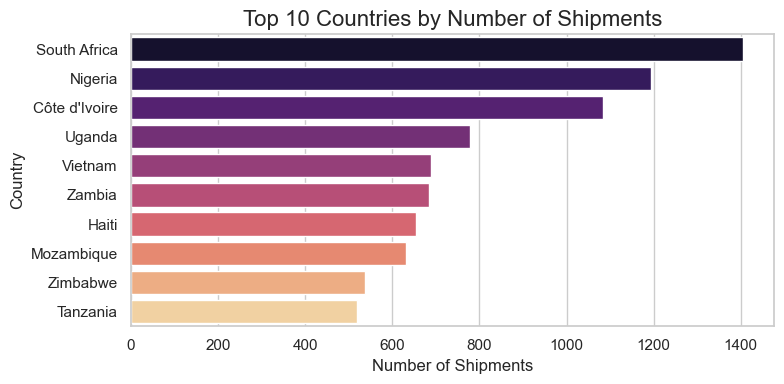

In [101]:
#  1.  Top 10 Countries by Number of Shipments
print("\n 1. 🌏 Top 10 Countries by Number of Shipments")
top_10_countries = data['Country'].value_counts().head(10)
print("\n")

# Create a count plot for the top 10 countries
plt.figure(figsize=(8, 4))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, hue=top_10_countries.index, palette='magma')
plt.title('Top 10 Countries by Number of Shipments', fontsize=16)
plt.xlabel('Number of Shipments', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.tight_layout()
plt.show()


 2. 🚢 Shipment Mode Analysis 




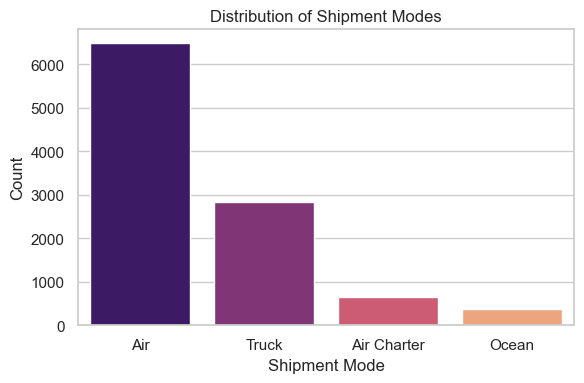

In [102]:
# 2. Shipment Mode Analysis
print("\n 2. 🚢 Shipment Mode Analysis ")
print("\n")
plt.figure(figsize=(6, 4))
sns.countplot(x='Shipment Mode', data=data, hue='Shipment Mode', palette='magma',)
plt.title('Distribution of Shipment Modes')
plt.xlabel('Shipment Mode')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


In [60]:
# Bivariate Analysis:  Between Freight Cost (USD) and Line Item Value.


 💰 Freight Cost vs. Line Item Value 




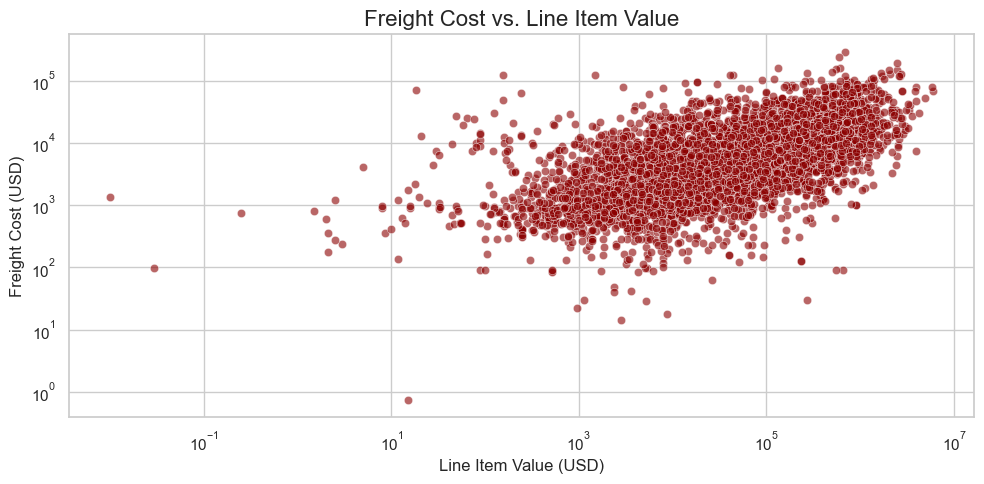

In [103]:
print("\n 💰 Freight Cost vs. Line Item Value ")
print("\n")

# 1. Scatter plot of Freight Cost vs. Line Item Value
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Line Item Value', y='Freight Cost (USD)', data=analysis_df, alpha=0.6, color='darkred')
plt.title('Freight Cost vs. Line Item Value', fontsize=16)
plt.xlabel('Line Item Value (USD)', fontsize=12)
plt.ylabel('Freight Cost (USD)', fontsize=12)
plt.xscale('log') 
plt.yscale('log')
plt.tight_layout()
plt.show()


In [10]:
# Logistics & Delivery Performance Sector

In [11]:
# Key problems in this sector
# 1. On-time delivery rates
# It helps the company to understand if their delievery is on-time or not. It can identify which vendor is reliable, which routes are efficient.


Are we on time? 
On-Time Delivery Rate: 88.51%




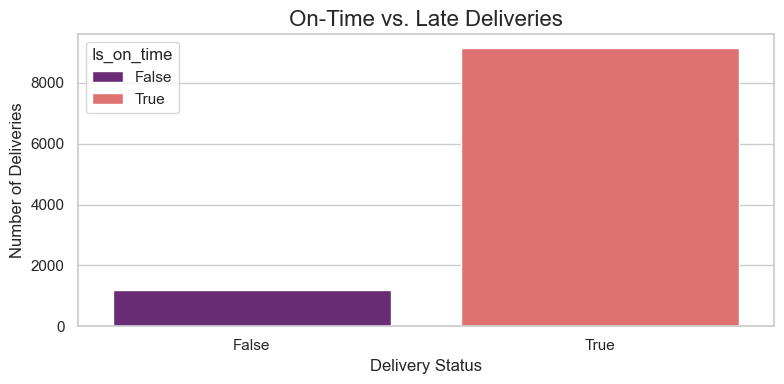

In [84]:

# Convert date columns to datetime objects
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'])
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])

# Drop rows with missing or invalid dates
analysis_data = data.dropna(subset=['Scheduled Delivery Date', 'Delivered to Client Date'])

# Define On-Time deliveries
analysis_data['Is_on_time']=analysis_data['Delivered to Client Date']<=analysis_data['Scheduled Delivery Date']

# Calculate the on-time delivery rate as a percentage
on_time= analysis_data['Is_on_time'].mean()*100
print("\nAre we on time? ")
print(f"On-Time Delivery Rate: {on_time:.2f}%")
print("\n")
# Visualize the result
plt.figure(figsize=(8, 4))
sns.countplot(x='Is_on_time',hue='Is_on_time', data=analysis_data, palette='magma',)
plt.title('On-Time vs. Late Deliveries', fontsize=16)
plt.xlabel('Delivery Status', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
#2. Average Delivery Duration by Shipment Mode
# This insight is crucial for a company that needs to balance delivery speed with cost.

In [47]:
# Convert date columns to datetime objects
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])
data['PO Sent to Vendor Date'] = pd.to_datetime(data['PO Sent to Vendor Date'])

# Drop rows with missing or invalid dates
analysis_data = data.dropna(subset=['Delivered to Client Date','PO Sent to Vendor Date']).copy()

# Calculate delivery duration (lead time)
# Remove .dt.days to keep the full Timedelta object
analysis_data['Delivery_Duration'] = analysis_data['Delivered to Client Date'] - analysis_data['PO Sent to Vendor Date']

# Group the data by 'Shipment Mode' and calculate the average duration for each mode.
avg_duration_by_mode = analysis_data.groupby('Shipment Mode')['Delivery_Duration'].mean()


## 3. Result
# Print a clean header for the output
print("\nHow long does it take?")
print("Average Delivery Duration by Shipment Mode\n")
print(avg_duration_by_mode)


How long does it take?
Average Delivery Duration by Shipment Mode

Shipment Mode
Air           109 days 19:14:26.783831282
Air Charter              80 days 22:40:00
Ocean         176 days 20:51:08.852459016
Truck          55 days 00:01:48.816120907
Name: Delivery_Duration, dtype: timedelta64[ns]


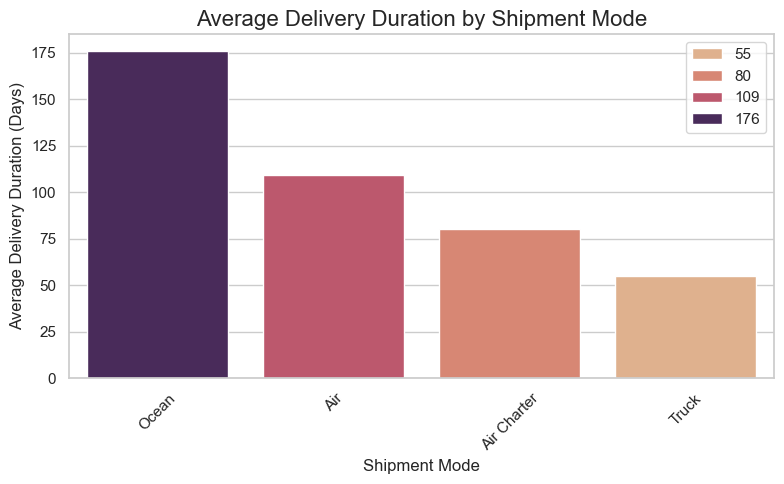

In [83]:
# Sort the average durations by the number of days, in descending order
sorted_avg_duration_days = avg_duration_by_mode.dt.days.sort_values(ascending=False)

# Visualize the result
plt.figure(figsize=(8, 5))
sns.barplot(x=sorted_avg_duration_days.index, y=sorted_avg_duration_days.values,hue=sorted_avg_duration_days.values, palette='flare')
plt.title('Average Delivery Duration by Shipment Mode', fontsize=16)
plt.xlabel('Shipment Mode', fontsize=12)
plt.ylabel('Average Delivery Duration (Days)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Cost & Financial Analysis

In [ ]:
# Key problems in this sector
# 1.  Identifying Cost Drivers
# A company needs to know what truly drives its costs. The main goal here is to find which variables, like Line Item Value or Weight, have the strongest relationship with Freight Cost.

In [91]:
cost_drivers_df = data[[
    'Freight Cost (USD)',
    'Line Item Value',
    'Line Item Quantity',
    'Weight (Kilograms)'
]].copy()

# Convert columns with string values to a numerical format
cost_drivers_df['Freight Cost (USD)'] = pd.to_numeric(cost_drivers_df['Freight Cost (USD)'], errors='coerce')
cost_drivers_df['Weight (Kilograms)'] = pd.to_numeric(cost_drivers_df['Weight (Kilograms)'], errors='coerce')


# Drop any rows with missing values to ensure the correlation is accurate
cost_drivers_df.dropna(inplace=True)

# Calculate the correlation matrix
correlation_matrix = cost_drivers_df.corr()

print("\n *Correlation Matrix of Cost Drivers\n")
print(correlation_matrix)



 *Correlation Matrix of Cost Drivers

                    Freight Cost (USD)  Line Item Value  Line Item Quantity  \
Freight Cost (USD)            1.000000         0.429478            0.378032   
Line Item Value               0.429478         1.000000            0.817290   
Line Item Quantity            0.378032         0.817290            1.000000   
Weight (Kilograms)            0.232052         0.348098            0.352776   

                    Weight (Kilograms)  
Freight Cost (USD)            0.232052  
Line Item Value               0.348098  
Line Item Quantity            0.352776  
Weight (Kilograms)            1.000000  


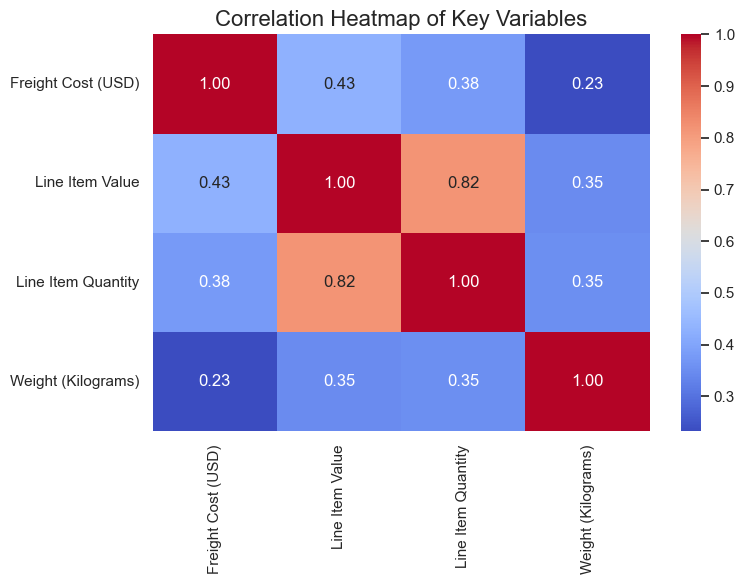

In [78]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Key Variables', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# 2. Top 10 Most Expensive Shipments
# What were our 10 most expensive shipments, and what made them so costly?

In [82]:
# Convert string column into numeric format
data['Freight Cost (USD)'] = pd.to_numeric(data['Freight Cost (USD)'])

# Sort the data by Freight Cost (USD) in descending order
top_10_shipments = data.sort_values(by='Freight Cost (USD)', ascending=False)

# Get the first 10 rows from the sorted data
# .head(10) gets you the top 10 results
top_10_expensive_shipments = top_10_shipments.head(10)

print("\n *Top 10 Most Expensive Shipments \n")
print(top_10_expensive_shipments[['Freight Cost (USD)', 'Shipment Mode', 'Weight (Kilograms)']])



Top 10 Most Expensive Shipments 

      Freight Cost (USD) Shipment Mode Weight (Kilograms)
4062           289653.20           Air              18667
4307           241407.27           Air              18580
8850           194623.44   Air Charter              87076
4218           161962.32           Air              17367
6848           161712.87           Air              16035
5367           152368.70           Air              13749
4033           146850.66           Air              24556
4734           146734.85           Air              34074
6255           139951.34           Air              13656
7115           132890.27           Air              20269


In [92]:
# Vendor Management

In [93]:
# Key problems in this sector
# 1. Analyze On-Time Delivery Performance by Vendor
# Which vendors are the most and least reliable for on-time delivery?

In [89]:
# Convert date columns to datetime objects
data['Scheduled Delivery Date'] = pd.to_datetime(data['Scheduled Delivery Date'])
data['Delivered to Client Date'] = pd.to_datetime(data['Delivered to Client Date'])

# Drop rows with missing dates for a clean analysis
analysis_df = data.dropna(subset=['Scheduled Delivery Date', 'Delivered to Client Date']).copy()

# Create a boolean column 'Is_On_Time' (True if on time, False if late)
analysis_df['Is_On_Time'] = analysis_df['Delivered to Client Date'] <= analysis_df['Scheduled Delivery Date']

# Group by 'Vendor Name' and calculate the mean of 'Is_On_Time'
# This gives us the on-time delivery rate (as a value between 0 and 1) for each vendor.
vendor_performance = analysis_df.groupby('Vendor')['Is_On_Time'].mean()

# Sort the results to find the best-performing vendors
top_vendors = vendor_performance.sort_values(ascending=False).head(10)

# Sort the results to find the worst-performing vendors
worst_vendors = vendor_performance.sort_values(ascending=True).head(10)


print("\n *Top 10 Best Performing Vendors (By On-Time Rate)\n")
print(top_vendors)

print("\n *Top 10 Worst Performing Vendors (By On-Time Rate)\n")
print(worst_vendors)


 *Top 10 Best Performing Vendors (By On-Time Rate)

Vendor
ABBOTT LABORATORIES (PUERTO RICO)                               1.0
ABBOTT LOGISTICS B.V.                                           1.0
ABBVIE, SRL (FORMALLY ABBOTT LABORATORIES INTERNATIONAL CO.)    1.0
ACCESS BIO, INC.                                                1.0
ACCOUN NIGERIA LIMITED                                          1.0
ACTION MEDEOR E.V.                                              1.0
ACOUNS NIGERIA LTD                                              1.0
AHN (PTY) LTD (AKA UCB (S.A.)                                   1.0
AMSTELFARMA B.V.                                                1.0
TURE PHARMACEUTICALS & MEDICAL SUPPLIES P.L.C.                  1.0
Name: Is_On_Time, dtype: float64

 *Top 10 Worst Performing Vendors (By On-Time Rate)

Vendor
SCMS from RDC                                                       0.828460
BIO-RAD LABORATORIES (FRANCE)                                       0.857143
Aurobindo Ph